# Demo No. 10 - Data sets

In this demo, we will introduce a new class of objects dedicated to handling observations brought from the outside of the Elisa framework. For now, photometric and radial velocity data can be inported using the `DataSet`. Main task of this data handling dataframe is to unify various input data formats and to transform them into the form consistent with our analytics tools described in the later demos.

In [1]:
import astropy.units as u

from elisa.analytics import LCData, RVData

Initially, we should define an observational data with which we will work. The easiest way how to do so is to load them directly from file:

In [2]:
rv_filename = 'demo_data/rv_data/rv1.dat'
lc_filename = 'demo_data/lc_data/KIC04851217.lc.pulse_removed.dat'

# radial velocities, column indices are expected in order (time, rv, rv_err)
rv_data = RVData.load_from_file(rv_filename, x_unit=u.d, y_unit=u.km/u.s, data_columns=(0, 1, 2))

# normalised light curve 
lc_data = LCData.load_from_file(lc_filename, x_unit=u.d, y_unit=None, data_columns=(0, 1, 2))
# light curve in magnitudes
# lc_data = LCData.load_from_file(lc_filename, x_unit=u.d, y_unit=u.mag, data_columns=(0, 1, 2), reference_magnitude=11.8)

`load_from_file()` function can handle data formats with the observational data ordered in columns. The user can specify the position of `x`, `y` or `y_err` column with the corresponding indices.

Datasets can be initialized also from arrays using following syntax. After the initialization of `lcV_data` dataset, magnitudes were converted into fluxes. Therefore this time, `reference magnitude` was not needed:

In [3]:
lc_data2 = LCData(x_data=lc_data.x_data, 
                  y_data=lc_data.y_data, 
                  y_err=lc_data.y_err, 
                  x_unit=lc_data.x_unit, 
                  y_unit=lc_data.y_unit,
                 )

These data sets are now converted into base Elisa base units and can be later handled with our analytics functions:

In [4]:
rv_data.x_data, rv_data.x_unit, rv_data.y_data, rv_data.y_err, rv_data.y_unit

(array([55368.6964, 55369.6875, 55369.7405, 55369.7709, 55369.819 ,
        55401.8413, 55401.9126, 55405.7796, 55431.7139, 55432.75  ,
        55432.782 , 55432.848 , 55432.9085, 55716.9126, 55753.8661,
        55815.8161, 56234.6485, 56235.6521, 56488.6784]),
 Unit("d"),
 array([  26450., -138280., -137220., -120840., -107080., -144060.,
        -110210.,   25740.,  -65020.,   71840.,   67420.,   58270.,
          35850.,   50850.,   70880.,   27820.,  -62810.,   68450.,
        -134760.]),
 array([4370., 3220., 3480., 3190., 3160., 6350., 6310., 7110., 3880.,
        3100., 3180., 3620., 3680., 3230., 3580., 3650., 3470., 3650.,
        5290.]),
 Unit("m / s"))

In [5]:
lc_data.x_data[:10], lc_data.x_unit, lc_data.y_data[:10], lc_data.y_data[:10], lc_data.y_unit

(array([54953.5388437, 54953.5592783, 54953.5797128, 54953.6001475,
        54953.6205821, 54953.6410166, 54953.6614512, 54953.6818859,
        54953.7023204, 54953.722755 ]),
 Unit("d"),
 array([1.00932029, 1.00699464, 1.00604838, 1.00442832, 1.00212621,
        1.00183719, 0.99892413, 0.99810449, 0.99689128, 0.99511892]),
 array([1.00932029, 1.00699464, 1.00604838, 1.00442832, 1.00212621,
        1.00183719, 0.99892413, 0.99810449, 0.99689128, 0.99511892]),
 Unit(dimensionless))

Data stored in `Dataset` are now ready to be used in analytics methods described later.

## Visualizing observation 

Observations can be quickly visualized with a following function:

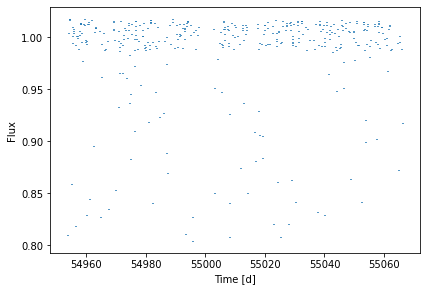

In [6]:
lc_data.plot.display_observation()

##  Phasing the observations

It is preferable in many cases to phase the observed data according to orbital period. Therefore the `Dataset` class allows you to perform such conversion in cases where ephemeris of the system is available.

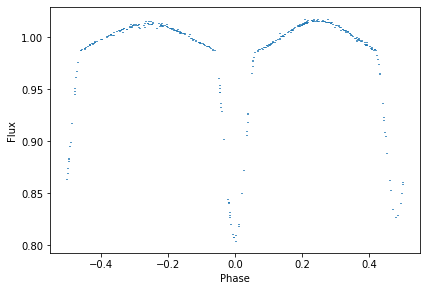

In [7]:
period = 2.47028  # d
t0 = 54953.900507000006  # d

lc_data.convert_to_phases(period, t0, centre=0.0)
lc_data.plot.display_observation()